In [3]:
import pandas as pd

# 데이터셋 불러오기
df = pd.read_json('')  # 데이터 파일 경로를 지정하세요

# 데이터의 기본 정보 확인
print("데이터셋의 기본 정보:")
print(df.info())

print("\n데이터셋의 첫 5행:")
print(df.head())

print("\n각 컬럼의 결측치 개수:")
print(df.isnull().sum())


데이터셋의 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      758 non-null    object
 1   input   758 non-null    object
 2   output  758 non-null    object
dtypes: object(3)
memory usage: 17.9+ KB
None

데이터셋의 첫 5행:
                                   id  \
0  nikluge-2024-대화 맥락 추론-train-000001   
1  nikluge-2024-대화 맥락 추론-train-000002   
2  nikluge-2024-대화 맥락 추론-train-000003   
3  nikluge-2024-대화 맥락 추론-train-000004   
4  nikluge-2024-대화 맥락 추론-train-000005   

                                               input       output  
0  {'conversation': [{'speaker': 2, 'utterance': ...  inference_2  
1  {'conversation': [{'speaker': 2, 'utterance': ...  inference_3  
2  {'conversation': [{'speaker': 2, 'utterance': ...  inference_3  
3  {'conversation': [{'speaker': 2, 'utterance': ...  inference_3  
4  {'conversation': [{'speaker': 2, 'utterance': ...  inf


발화의 길이 분포:
count    758.000000
mean      20.816623
std        4.788459
min       12.000000
25%       17.000000
50%       21.000000
75%       24.000000
max       30.000000
Name: utterance_length, dtype: float64


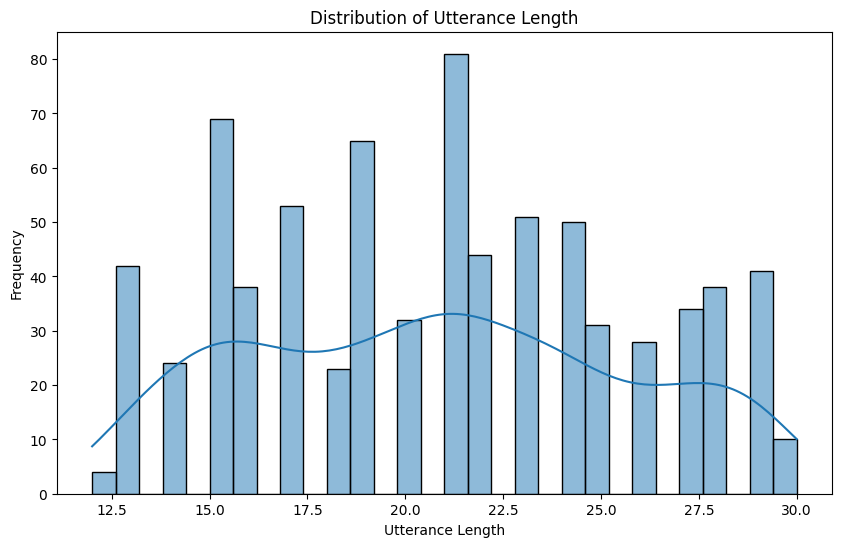

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 발화 길이 계산
df['utterance_length'] = df['input'].apply(lambda x: len(x['conversation']))

print("\n발화의 길이 분포:")
print(df['utterance_length'].describe())

# 발화 길이의 히스토그램 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.histplot(df['utterance_length'], kde=True, bins=30)
plt.title('Distribution of Utterance Length')
plt.xlabel('Utterance Length')
plt.ylabel('Frequency')
plt.savefig('train_utterance_length_distribution.png')
plt.show()


In [5]:
import matplotlib.font_manager as fm
# 한글 폰트 설정
font_path = ''  # 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 설정



카테고리별 데이터 개수:
category
반응      162
원인      161
전제      161
동기      156
후행사건    118
Name: count, dtype: int64


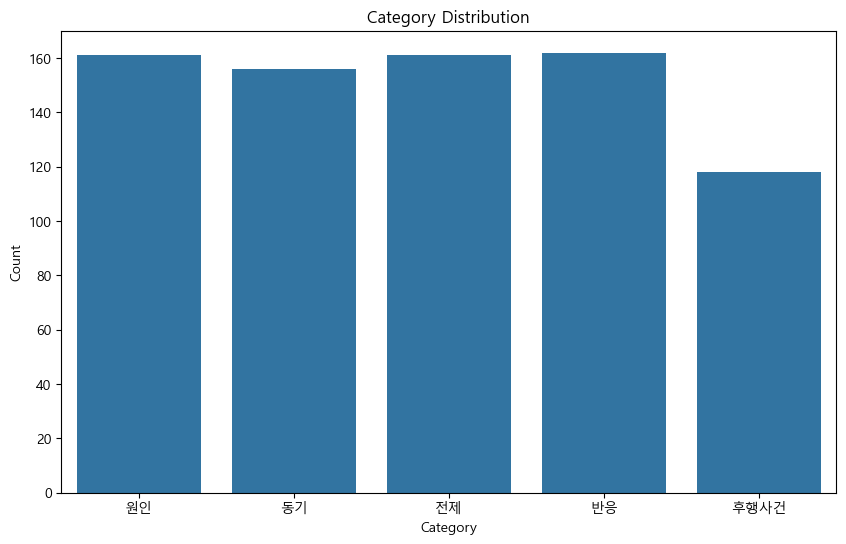

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['category'] = df['input'].apply(lambda x: x.get('category', 'Unknown'))
# 카테고리별 데이터 분포 확인
print("\n카테고리별 데이터 개수:")
print(df['category'].value_counts())

# 카테고리 분포 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig('train_category_distribution.png')
plt.show()


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 추론 컬럼 목록 생성
inference_columns = [col for col in df.columns if col.startswith('inference')]

# 각 추론 컬럼의 값 분포 확인 및 시각화 및 저장
for col in inference_columns:
    print(f"\n{col}의 값 분포:")
    print(df[col].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel('Inference')
    plt.savefig(f'{col}_distribution.png')
    plt.show()


In [8]:
# Reference ID에 따른 분포 확인
print("\nReference ID에 따른 분포:")
print(df['input'].apply(lambda x: x['reference_id']).explode().value_counts())



Reference ID에 따른 분포:
input
MDRW2100003410.1.11    5
MDRW2100043170.1.4     5
MDRW2100034153.1.17    5
MDRW2100010510.1.10    5
MDRW2100044988.1.18    5
                      ..
MDRW2100009203.1.16    1
MDRW2100030974.1.13    1
MDRW2100003081.1.13    1
MDRW2100032820.1.9     1
MDRW2100000243.3.13    1
Name: count, Length: 261, dtype: int64


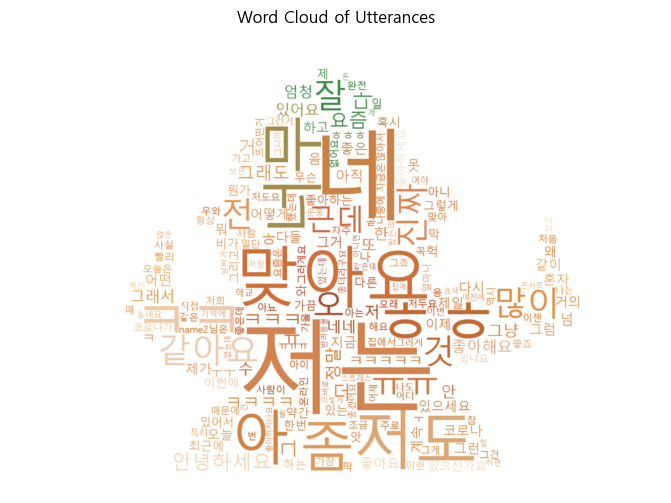

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 모든 발화 내용 합치기
all_text = ' '.join(df['input'].apply(lambda x: ' '.join([utter['utterance'] for utter in x['conversation']])))
font_path = ''
mask_path = ''  # 마스크 이미지 파일 경로

mask_image = np.array(Image.open(mask_path))  # 마스크 이미지 파일 경로

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False ,font_path=font_path, mask=mask_image).generate(all_text)

image_colors = ImageColorGenerator(mask_image)

# 워드클라우드 시각화 및 저장
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Utterances')
plt.savefig('train_utterance_wordcloud.png')
plt.show()



발화의 단어 수 분포:
count    758.000000
mean      91.463061
std       36.051528
min       24.000000
25%       65.000000
50%       89.000000
75%      110.000000
max      252.000000
Name: total_word_count, dtype: float64


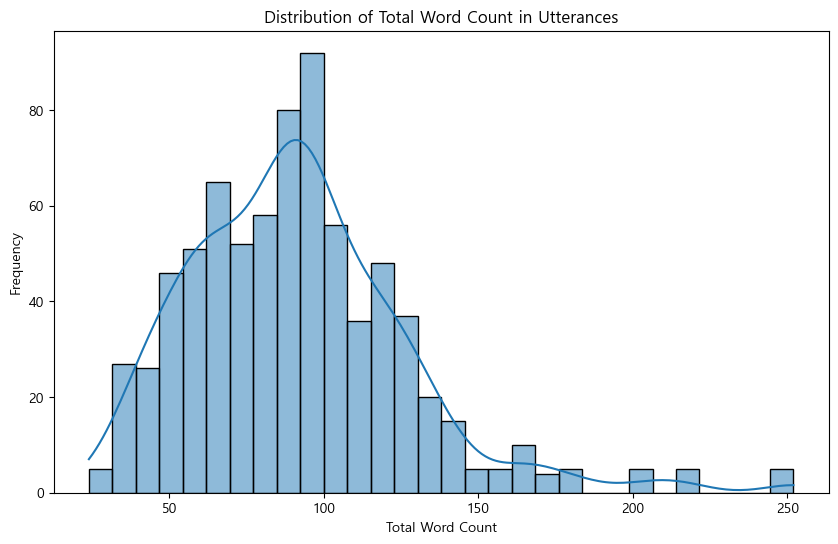

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 발화의 단어 수 계산
df['total_word_count'] = df['input'].apply(lambda x: sum([len(utter['utterance'].split()) for utter in x['conversation']]))

print("\n발화의 단어 수 분포:")
print(df['total_word_count'].describe())

# 단어 수 분포 히스토그램 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.histplot(df['total_word_count'], kde=True, bins=30)
plt.title('Distribution of Total Word Count in Utterances')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.savefig('train_word_count_distribution.png')
plt.show()



대화 내 발화 길이 변화:
0    [25, -18, 9, 8, -12, 8, -7, -7, -7, 17, -18, 1...
1    [25, -18, 9, 8, -12, 8, -7, -7, -7, 17, -18, 1...
2    [25, -18, 9, 8, -12, 8, -7, -7, -7, 17, -18, 1...
3    [25, -18, 9, 8, -12, 8, -7, -7, -7, 17, -18, 1...
4    [25, -18, 9, 8, -12, 8, -7, -7, -7, 17, -18, 1...
Name: utterance_diff, dtype: object


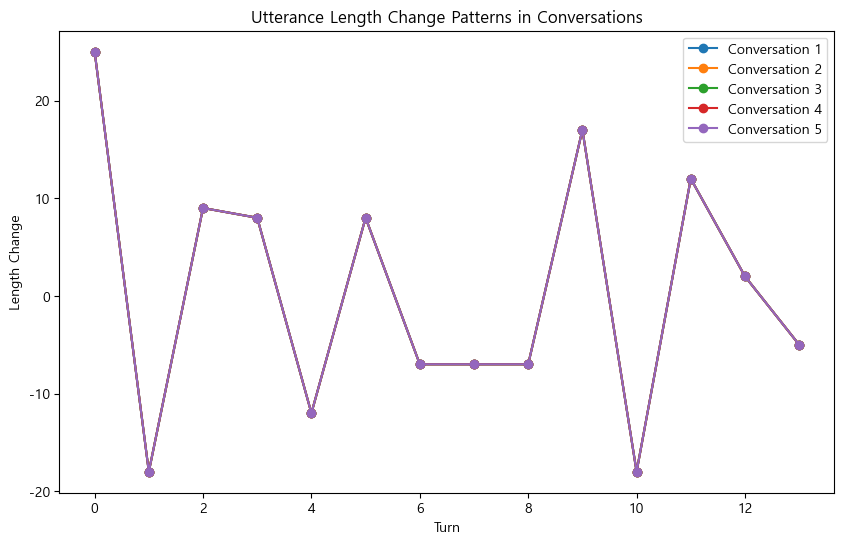

In [11]:
import matplotlib.pyplot as plt

# 발화 길이 변화 패턴 분석
df['utterance_lengths'] = df['input'].apply(lambda x: [len(utter['utterance']) for utter in x['conversation']])
df['utterance_diff'] = df['utterance_lengths'].apply(lambda x: [j-i for i, j in zip(x[:-1], x[1:])])

print("\n대화 내 발화 길이 변화:")
print(df['utterance_diff'].head())

# 발화 길이 변화 패턴 시각화 및 저장
plt.figure(figsize=(10, 6))
for i in range(min(5, len(df))):
    plt.plot(df['utterance_diff'].iloc[i], marker='o', label=f'Conversation {i+1}')
plt.title('Utterance Length Change Patterns in Conversations')
plt.xlabel('Turn')
plt.ylabel('Length Change')
plt.legend()
plt.savefig('train_utterance_length_change_patterns.png')
plt.show()


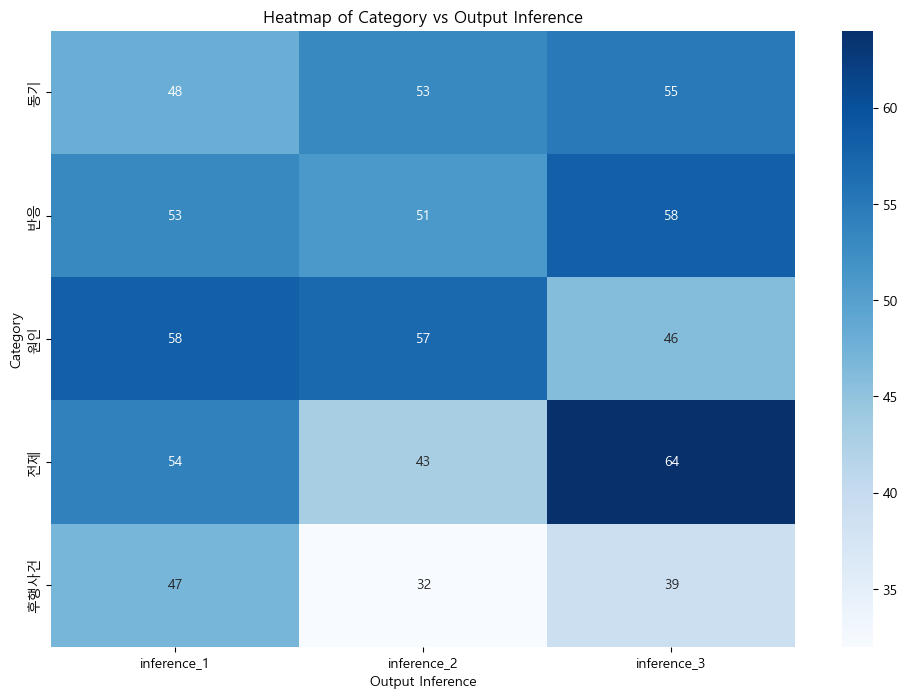

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 카테고리와 추론 간의 관계 분석
category_inference = pd.crosstab(df['category'], df['output'])

# 히트맵 시각화 및 저장
plt.figure(figsize=(12, 8))
sns.heatmap(category_inference, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Category vs Output Inference')
plt.xlabel('Output Inference')
plt.ylabel('Category')
plt.savefig('train_category_vs_inference_heatmap.png')
plt.show()



발화 내용에서 자주 등장하는 단어 분석:
   Word  Frequency
0    저는        570
1    저도        446
2    너무        433
3    ㅎㅎ        413
4     네        409
5   맞아요        403
6     좀        364
7    ㅋㅋ        337
8     잘        321
9     전        319
10   많이        316
11    것        309
12    아        307
13   진짜        290
14  같아요        275
15   ㅠㅠ        265
16    오        258
17   근데        249
18    다        246
19    더        223


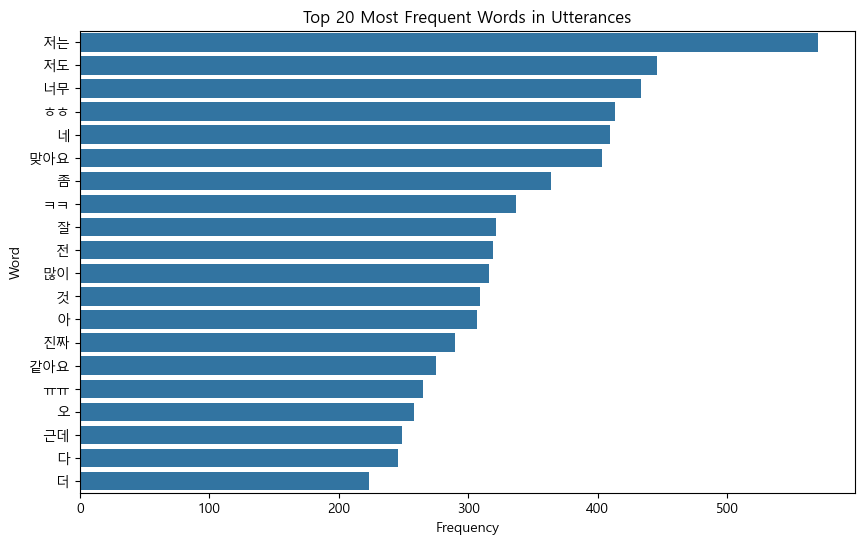

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def word_frequency(text, num_words=10):
    words = text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(num_words)
    return pd.DataFrame(common_words, columns=['Word', 'Frequency'])

print("\n발화 내용에서 자주 등장하는 단어 분석:")
common_words_df = word_frequency(all_text, num_words=20)
print(common_words_df)

# 자주 등장하는 단어 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Frequency', y='Word')
plt.title('Top 20 Most Frequent Words in Utterances')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.savefig('train_top_frequent_words.png')
plt.show()
